## EDA & Data Preprocessing

In [1]:
import warnings
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\專案\Projects\Used Cars\Data\vehicles.csv').drop('index', axis=1, errors='ignore')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [77]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [92]:
# Check each column's grouped value
df.groupby('manufacturer').size()

manufacturer
acura               5978
alfa-romeo           897
aston-martin          24
audi                7573
bmw                14699
buick               5501
cadillac            6953
chevrolet          55064
chrysler            6031
datsun                63
dodge              13707
ferrari               95
fiat                 792
ford               70985
gmc                16785
harley-davidson      153
honda              21269
hyundai            10338
infiniti            4802
jaguar              1946
jeep               19014
kia                 8457
land rover            21
lexus               8200
lincoln             4220
mazda               5427
mercedes-benz      11817
mercury             1184
mini                2376
mitsubishi          3292
morgan                 3
nissan             19067
pontiac             2288
porsche             1384
ram                18342
rover               2113
saturn              1090
subaru              9495
tesla                868
toyota      

In [13]:
# Check how many manufacturers are there
df['manufacturer'].nunique()

42

In [93]:
df.groupby('condition').size()

condition
excellent    101467
fair           6769
good         121456
like new      21178
new            1305
salvage         601
dtype: int64

<Axes: >

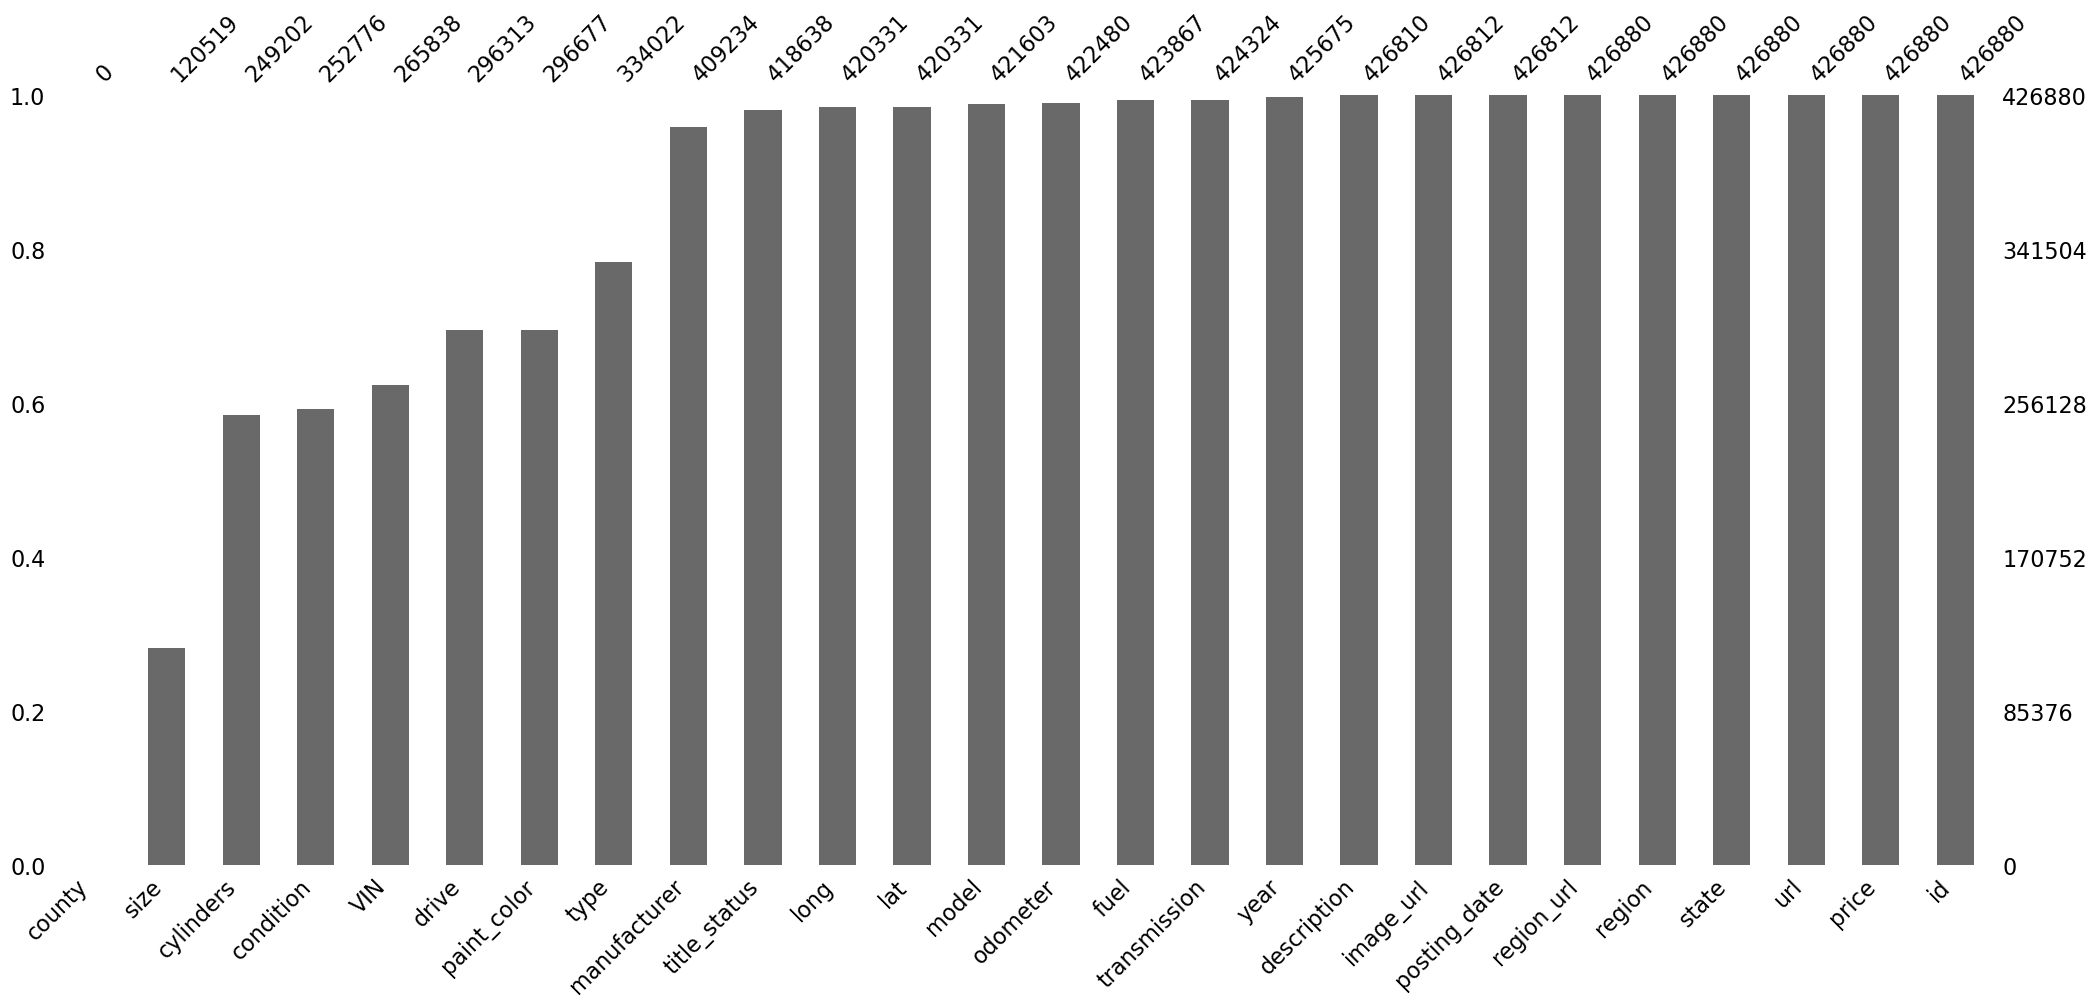

In [4]:
msno.bar(df, sort='ascending')

<Figure size 1000x600 with 0 Axes>

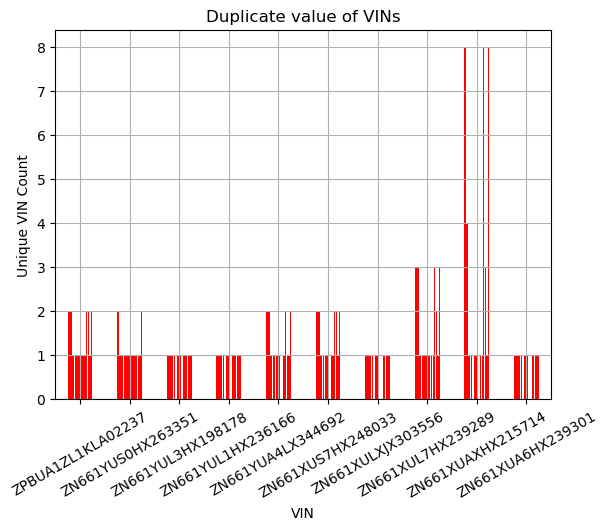

In [6]:
# Check duplicates with VIN number
group_by_vin = df.groupby('VIN').nunique().sort_values(ascending=False, by='VIN')

plt.figure(figsize=(10, 6))
group_by_vin.head(10).plot(kind='bar', grid=True, rot=30, xlabel="VIN", ylabel='Unique VIN Count', title='Duplicate value of VINs', color='red')
plt.legend().remove()
plt.show()

In [7]:
df['odometer'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      6318.0
0.25     37704.0
0.50     85548.0
0.75    133542.5
0.95    204000.0
Name: odometer, dtype: float64

Text(0.5, 0, 'Odometer (k)')

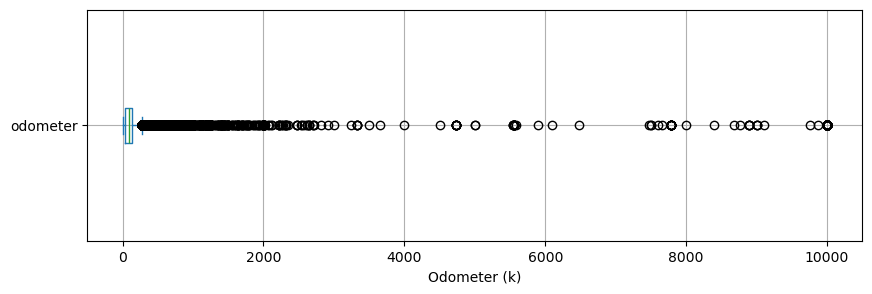

In [23]:
ax = (df['odometer'] / 1000).plot(kind='box', vert=False, figsize=(10, 3), grid=True)
ax.set_xlabel('Odometer (k)')

<Axes: title={'center': 'Price Distribution'}, xlabel='Price', ylabel='Count'>

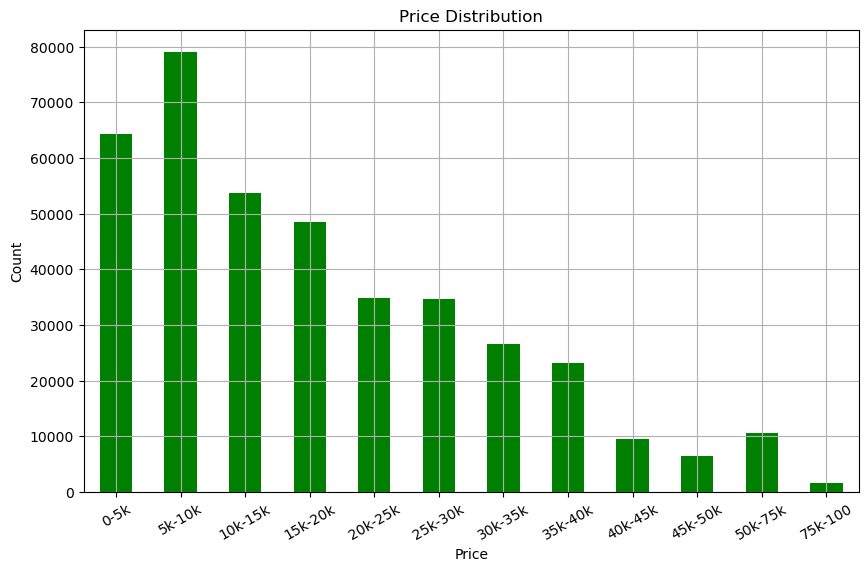

In [62]:
import math

price_distribution = pd.cut(df['price'], 
                            bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 75000, 100000], 
                            labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k-75k', '75k-100']
                            )

price_distribution = price_distribution.value_counts()
price_distribution = price_distribution.sort_index()

plt.figure(figsize=(10, 6))
price_distribution.plot(kind='bar', grid=True, rot=30, xlabel="Price", ylabel='Count', title='Price Distribution', color='green')

In [60]:
min_price = df['price'].sort_values(ascending=True)
min_price


335266             0
97994              0
97995              0
97996              0
356355             0
             ...    
37410     3009548743
91576     3024942282
257840    3024942282
318592    3736928711
356716    3736928711
Name: price, Length: 426880, dtype: int64

Text(0.5, 0, 'price')

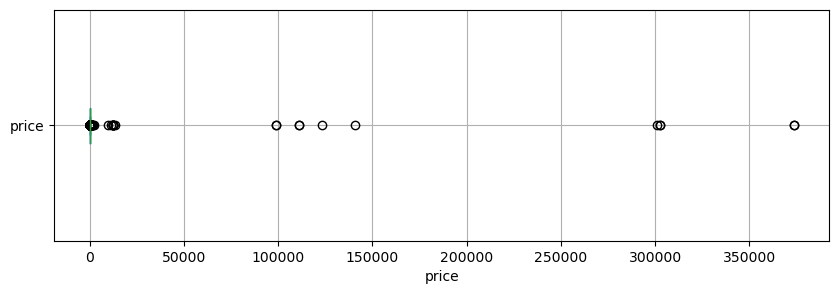

In [64]:
ax = (df['price'] / 10000).plot(kind='box', vert=False, figsize=(10, 3), grid=True)
ax.set_xlabel('price')

### Issues with this dataset  
－Missing values with multiple columns  
－Data type needs to change with "year" and "odometer"  
－Duplicate values with "VIN"  
－Outlier value with "price" and "odometer"
  
This data set was webscraped from a used car selling platform, so it contains a lot of duplicate data with the same VIN number. This means that the car is the same, but the seller has various posts over time. To use this data set for training models, we need to clean it up. We want to estimate the value of used cars, so certain columns are very important, such as the year of the car, the selling price, the odometer reading, and the manufacturer. Additionally, we will remove any unwanted columns.


### Data Preprocessing

In [3]:
# Remove duplicates not working
# Need other method to remove duplicates
df = df.drop_duplicates()
df.shape

(426880, 26)

In [4]:
# Remove Unwanted Columns
df_drop = df.drop(columns=["url", 
                           "region_url", 
                           "image_url",
                           "description", 
                           "lat", 
                           "long", 
                           "id" ,
                           "county"
                           ], errors='ignore')

In [5]:
# Remove rows with missing values
# Not helpful on this dataset

# Remove where price is 0 and null
df_filtered_price = df_drop[df_drop['price'] != 0]
df_filtered_price2 = df_filtered_price[df_filtered_price['price'].notnull()]


# Remove where year is null
df_filtered_price2.loc[:, 'year'] = pd.to_numeric(df_filtered_price2['year'], errors='coerce')
df_filtered_year = df_filtered_price2[df_filtered_price2['year'].notnull()]
null_year = df_filtered_year['year'].isnull().any()


# Remove where manufacturer is null
df_filtered_manu = df_filtered_year[df_filtered_year['manufacturer'].notnull()].copy()
df_filtered_manu.loc[:, 'manufacturer'] = df_filtered_manu['manufacturer'].replace('rover', 'land rover')


# Remove where model is null
df_filtered_model = df_filtered_manu[df_filtered_manu['model'].notnull()]


# Remove where odometer is 0 or null
df_filtered_odom = df_filtered_model[df_filtered_model['odometer'] != 0]
df_filtered_odom2 = df_filtered_odom[df_filtered_odom['odometer'].notnull()]

In [6]:
# The near date's data is more reliable

# Sort by 'VIN' and 'date'
df_filtered_odom2.loc[:, 'posting_date'] = pd.to_datetime(df_filtered_odom2['posting_date'], utc=True)
df_sorted = df_filtered_odom2.sort_values(by=['VIN', 'posting_date'], ascending=[True, False])


# Remove duplicates with same VIN number, keep the first (which is the most recent because of the sort)
df_VIN = df_sorted.drop_duplicates(subset='VIN', keep='first')


# Remove rows with same odometer, model and year
df_unique = df_VIN.drop_duplicates(subset=['odometer', 'model', 'year'])
print(df_unique.shape)


(101129, 18)


In [7]:
# Change dtype of columns
df_unique['year'] = df_unique['year'].astype('int')
df_unique['odometer'] = df_unique['odometer'].astype('int')

C:\Users\no\AppData\Local\Temp\ipykernel_23304\1850853530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['year'] = df_unique['year'].astype('int')
C:\Users\no\AppData\Local\Temp\ipykernel_23304\1850853530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['odometer'] = df_unique['odometer'].astype('int')


In [8]:
# Remove rows with price outliers
Q1 = df_unique['price'].quantile(0.25)
Q3 = df_unique['price'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_unique['price'] >= Q1 - 1.5 * IQR) & (df_unique['price'] <= Q3 + 1.5 * IQR)
df_filtered_outliers = df_unique.loc[filter]  

print(df_unique.shape)
print(df_filtered_outliers.shape)

(101129, 18)
(97495, 18)


In [9]:
# Remove rows with price 1~500
# Due to the range of price is only for advertisement, the price should be more than 500
df_filtered_100 = df_filtered_outliers[(df_filtered_outliers['price'] < 1) | (df_filtered_outliers['price'] > 500)]

print(df_filtered_outliers.shape)
print(df_filtered_100.shape)

(97495, 18)
(94576, 18)


In [10]:
# Reset index
df_reset = df_filtered_100.reset_index(drop=True)

# Add new column for later use on web scraping
df_reset['combined'] = df_reset.apply(lambda row: f"{row['year']} {row['manufacturer']} {row['model']}", axis=1)

In [11]:
df_reset

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,combined
0,palm springs,45000,1973,chevrolet,corvette stingray,excellent,8 cylinders,gas,65000,clean,manual,00000000000000000,NaN,NaN,convertible,NaN,ca,2021-04-19 01:17:33+00:00,1973 chevrolet corvette stingray
1,minneapolis / st paul,13500,1938,dodge,d8,good,6 cylinders,gas,87782,clean,manual,00000000030071477,rwd,full-size,sedan,NaN,mn,2021-05-03 21:32:50+00:00,1938 dodge d8
2,seattle-tacoma,6995,1995,chevrolet,camaro yanase,NaN,6 cylinders,gas,37989,clean,automatic,000000000CF44603Y,rwd,NaN,hatchback,white,wa,2021-05-04 21:00:54+00:00,1995 chevrolet camaro yanase
3,oklahoma city,18999,1968,volkswagen,beetle,NaN,NaN,other,99462,clean,manual,00000000118683018,NaN,NaN,NaN,NaN,ok,2021-04-15 16:58:54+00:00,1968 volkswagen beetle
4,oklahoma city,14999,1969,volkswagen,beetle,NaN,NaN,other,53368,clean,manual,00000000119690287,NaN,NaN,NaN,NaN,ok,2021-04-15 16:58:39+00:00,1969 volkswagen beetle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94571,atlanta,17990,2019,fiat,500l pop hatchback 4d,good,NaN,gas,3533,clean,other,ZFBNFAAH9KZ041937,fwd,NaN,hatchback,red,ga,2021-05-04 20:21:22+00:00,2019 fiat 500l pop hatchback 4d
94572,bellingham,2986,2013,ferrari,458 spider,NaN,8 cylinders,gas,23158,clean,automatic,ZFF68NHA3D0195998,rwd,NaN,convertible,NaN,wa,2021-04-29 17:01:34+00:00,2013 ferrari 458 spider
94573,seattle-tacoma,2034,2017,ferrari,california t,NaN,8 cylinders,gas,9968,clean,automatic,ZFF77XJA8H0220834,rwd,NaN,convertible,NaN,wa,2021-05-04 17:00:37+00:00,2017 ferrari california t
94574,pittsburgh,43000,1986,ferrari,mondial cabriolet,excellent,8 cylinders,gas,33000,clean,manual,ZFFXC26A3G0060965,rwd,mid-size,convertible,red,pa,2021-04-28 14:21:28+00:00,1986 ferrari mondial cabriolet


In [12]:
df_reset.to_csv('df94567.csv', index=False, encoding='utf-8-sig')

### Sampling

In [74]:
# Setting the confidence interval, margin of error, population size, and population proportion
import math

def calculate_sample_size(confidence_level, margin_of_error, population_size, population_proportion=0.5):
    # Z-values corresponding to confidence intervals
    Z_values = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    Z = Z_values.get(confidence_level, 1.96)  # Default to 95% confidence level
    
    # Calculate unadjusted sample size
    n = (Z**2 * population_proportion * (1 - population_proportion)) / margin_of_error**2
    n = math.ceil(n)  # Round up
    
    # Apply finite population correction formula
    adjusted_n = n / (1 + (n - 1) / population_size)
    adjusted_n = math.ceil(adjusted_n)  # Round up
    
    return adjusted_n

# Usage
confidence_level = 0.95
margin_of_error = 0.01
population_size = 94576

sample_size = calculate_sample_size(confidence_level, margin_of_error, population_size)
print(f"Required sample size: {sample_size}")

Required sample size: 8719


In [75]:
# Group by "manufacturer" column and randomly sample 10% of the entries from each group
sampled_df = df_reset.groupby('manufacturer').sample(frac=0.1)
print("\nRandomly sampled 10% of entries from each group by 'manufacturer':")
print(df_reset.shape)
print(sampled_df.shape)
sampled_df


Randomly sampled 10% of entries from each group by 'manufacturer':
(94576, 19)
(9458, 19)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,combined
403,boise,12884,2010,acura,tl,NaN,6 cylinders,gas,144929,clean,automatic,19UUA9F52AA004490,4wd,NaN,sedan,grey,id,2021-04-28 14:31:29+00:00,2010 acura tl
62073,boulder,24500,2016,acura,rdx,excellent,6 cylinders,gas,55035,clean,automatic,5J8TB4H57GL013689,4wd,NaN,SUV,blue,co,2021-05-02 01:45:35+00:00,2016 acura rdx
71868,seattle-tacoma,17495,2012,acura,tsx sport wagon w/tech 79k miles heated leathe...,NaN,4 cylinders,gas,79913,clean,automatic,JH4CW2H6XCC004879,fwd,NaN,wagon,black,wa,2021-05-05 03:15:45+00:00,2012 acura tsx sport wagon w/tech 79k miles he...
71912,cincinnati,14999,2014,acura,rlx,NaN,NaN,gas,110849,clean,automatic,JH4KC1F57EC000218,fwd,NaN,sedan,black,oh,2021-04-17 17:01:52+00:00,2014 acura rlx
61939,indianapolis,7495,2009,acura,rdx,excellent,6 cylinders,gas,158534,clean,automatic,5J8TB18299A003426,4wd,NaN,SUV,black,in,2021-05-01 13:19:38+00:00,2009 acura rdx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93612,san antonio,750,2005,volvo,s40,NaN,5 cylinders,gas,99520,clean,automatic,YV1MS382052046369,fwd,mid-size,coupe,silver,tx,2021-05-02 21:52:53+00:00,2005 volvo s40
93665,lancaster,4995,2007,volvo,s60 2.5t,good,5 cylinders,gas,171481,clean,automatic,YV1RH592972619397,4wd,NaN,sedan,grey,pa,2021-04-24 17:44:25+00:00,2007 volvo s60 2.5t
94023,baltimore,3500,2007,volvo,xc90,NaN,6 cylinders,gas,145661,clean,automatic,YV4CN982971391787,fwd,NaN,SUV,grey,md,2021-04-20 23:02:13+00:00,2007 volvo xc90
93408,los angeles,16590,2015,volvo,v60 t5 premier wagon 4d,good,NaN,other,87880,clean,automatic,YV140MEB5F1198767,fwd,NaN,wagon,white,ca,2021-05-03 17:31:29+00:00,2015 volvo v60 t5 premier wagon 4d


In [76]:
# Reset index and save to csv
df_reset = sampled_df.reset_index(drop=True)
df_reset.to_csv('output_sampled.csv', index=False, encoding='utf-8-sig')

In [40]:
# Divide the CSV file into smaller files
# Increase the effeciency of web scraping

import pandas as pd
import os


def split_csv_file(file_path, output_path, rows_per_file):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Calculate the number of files
    num_files = len(df) // rows_per_file
    if len(df) % rows_per_file != 0:
        num_files += 1

    # Split the DataFrame into smaller DataFrames
    dfs = [df[i*rows_per_file:(i+1)*rows_per_file] for i in range(num_files)]

    # Write each smaller DataFrame to a separate CSV file
    for i, df_i in enumerate(dfs):
        df_i.to_csv(f"{output_path}/output_{i+1}.csv", index=False)

# Usage
split_csv_file(r"D:\專案\Projects\Used Cars\Code\output_sampled.csv",
                r"D:\專案\Projects\Used Cars\Code\output_divided", 1000)

### Using Selenium for Webcraping Original MSRP of the car

In [ ]:
def selenium_extract_edge_rerun(keyword):

    from selenium import webdriver
    from selenium.webdriver.edge.service import Service
    from selenium.webdriver.edge.options import Options
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.common.keys import Keys
    from selenium.common.exceptions import NoSuchElementException
    import time
    import json, os
    import pandas as pd
    import random
    import re


    # enable the headless mode
    options = Options()
    options.add_argument("--enable-chrome-browser-cloud-management")

    #-----Optimize Browser Settings-----#
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    prefs = {"profile.managed_default_content_settings.images": 2, "javascript.enabled": False}
    options.add_experimental_option("prefs", prefs)
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--disable-extensions")
    options.add_argument("--disable-notifications")
    options.add_argument("--disable-popup-blocking")
    options.add_argument("--disable-geolocation")




    service = Service(executable_path="msedgedriver.exe")
    driver = webdriver.Edge(service=service, options=options)

    
    #input your website here
    driver.get("https://www.perplexity.ai/")


    # time.sleep(2)
    sleep_time = random.randint(1, 3)
    sleep_time2 = random.randint(5, 6)
    sleep_time3 = random.randint(3, 4)
    time.sleep(sleep_time)


    #First Page
    WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/main/div/div/div[2]/div/div/div/div[1]/div[2]/div/div/span/div/div/textarea'))
    )
    input_element = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/div/div[2]/div/div/div/div[1]/div[2]/div/div/span/div/div/textarea')                          
    input_element.clear()                                        # clear the search bar
    input_element.send_keys(keyword + Keys.ENTER)        # search for "tech with tim"
    time.sleep(sleep_time)


    time.sleep(sleep_time2)


    #scraping logic for the car info
    car_name = keyword

    try:
        car_msrp_1 = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/div/div[2]/div/div/div[2]/div[1]/div/div/div[1]/div/div/div[3]/div/div[1]/div[2]/div[2]/div[2]/div/div/div/div').text
        if re.search(r'\d', car_msrp_1):  # Check if car_msrp_1 contains any digits
            try:
                car_msrp = re.search(r'\$\d+,\d+', car_msrp_1).group()
            except AttributeError:  # re.search() returns None if no match is found, which causes AttributeError when .group() is called
                car_msrp = 'not found'
        else:
            car_msrp = 'not found'
    except NoSuchElementException:
        car_msrp = 'not found'



    print(car_name + car_msrp)



    # dictionary where to store the info
    car_info = {}
    car_info['car_name'] = car_name
    car_info['car_msrp'] = car_msrp


    df = pd.DataFrame([car_info])


    if not os.path.isfile(r'D:\專案\Projects\Used Cars\Code\output_divided\output_1.csv'):
        df.to_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_1.csv', header='column_names', encoding='utf-8')
    else:
        df.to_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_1.csv', mode='a', header=False, encoding='utf-8')


    time.sleep(sleep_time2)
    driver.close()
    driver.quit()





import time
from time import sleep
import csv, os, json
import pandas as pd
import random


columns_to_read = ['combined']
car_name_list = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_1.csv', usecols=columns_to_read)

counter = 0 # Initialize the counter

for keyword in car_name_list['combined'].values[0:]: # Iterate over each URL in the list
    selenium_extract_edge_rerun('what is the original MSRP of '+ keyword + ' car news in short sentence')
    print('sele runner complete')

    counter += 1 # Increment the counter

    if counter == 30: # Check if the counter has reached 50
        sleep(60) # Sleep for 30 seconds
        counter = 0 # Reset the counter

exit(0) # Exit the program

### Append new data (Original MSRP)

In [55]:
#1
df_old_1 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_1.csv').drop('index', axis=1, errors='ignore')
df_new_1 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_1.csv').drop('index', axis=1, errors='ignore')
print(df_old_1.shape)
print(df_new_1.shape)

df_new_1 = df_new_1.drop(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df_combined_1 = pd.merge(df_old_1, df_new_1, left_index=True, right_index=True)
print(df_combined_1.shape)

(1000, 19)
(1000, 5)
(1000, 21)


In [56]:
#2
df_old_2 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_2.csv').drop('index', axis=1, errors='ignore')
df_new_2 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_2.csv').drop('index', axis=1, errors='ignore')
print(df_old_2.shape)
print(df_new_2.shape)


df_new_2 = df_new_2.drop(['Unnamed: 0'], axis=1)
df_combined_2 = pd.merge(df_old_2, df_new_2, left_index=True, right_index=True)
print(df_combined_2.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [60]:
#3
df_old_3 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_3.csv').drop('index', axis=1, errors='ignore')
df_new_3 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_3.csv').drop('index', axis=1, errors='ignore')
print(df_old_3.shape)
print(df_new_3.shape)

df_new_3 = df_new_3.drop(['Unnamed: 0'], axis=1)
df_combined_3 = pd.merge(df_old_3, df_new_3, left_index=True, right_index=True)
print(df_combined_3.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [63]:
#4
df_old_4 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_4.csv').drop('index', axis=1, errors='ignore')
df_new_4 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_4.csv').drop('index', axis=1, errors='ignore')
print(df_old_4.shape)
print(df_new_4.shape)

df_new_4 = df_new_4.drop(['Unnamed: 0'], axis=1)
df_combined_4 = pd.merge(df_old_4, df_new_4, left_index=True, right_index=True)
print(df_combined_4.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [66]:
#5
df_old_5 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_5.csv').drop('index', axis=1, errors='ignore')
df_new_5 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_5.csv').drop('index', axis=1, errors='ignore')
print(df_old_5.shape)
print(df_new_5.shape)

df_new_5 = df_new_5.drop(['Unnamed: 0'], axis=1)
df_combined_5 = pd.merge(df_old_5, df_new_5, left_index=True, right_index=True)
print(df_combined_5.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [68]:
#6
df_old_6 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_6.csv').drop('index', axis=1, errors='ignore')
df_new_6 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_6.csv').drop('index', axis=1, errors='ignore')
print(df_old_6.shape)
print(df_new_6.shape)

df_new_6 = df_new_6.drop(['Unnamed: 0'], axis=1)
df_combined_6 = pd.merge(df_old_6, df_new_6, left_index=True, right_index=True)
print(df_combined_6.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [70]:
#7
df_old_7 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_7.csv').drop('index', axis=1, errors='ignore')
df_new_7 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_7.csv').drop('index', axis=1, errors='ignore')
print(df_old_7.shape)
print(df_new_7.shape)

df_new_7 = df_new_7.drop(['Unnamed: 0'], axis=1)
df_combined_7 = pd.merge(df_old_7, df_new_7, left_index=True, right_index=True)
print(df_combined_7.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [72]:
#8
df_old_8 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_8.csv').drop('index', axis=1, errors='ignore')
df_new_8 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_8.csv').drop('index', axis=1, errors='ignore')
print(df_old_8.shape)
print(df_new_8.shape)

df_new_8 = df_new_8.drop(['Unnamed: 0'], axis=1)
df_combined_8 = pd.merge(df_old_8, df_new_8, left_index=True, right_index=True)
print(df_combined_8.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [76]:
#9
df_old_9 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_9.csv').drop('index', axis=1, errors='ignore')
df_new_9 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_9.csv').drop('index', axis=1, errors='ignore')
print(df_old_9.shape)
print(df_new_9.shape)

df_new_9 = df_new_9.drop(['Unnamed: 0'], axis=1)
df_combined_9 = pd.merge(df_old_9, df_new_9, left_index=True, right_index=True)
print(df_combined_9.shape)

(1000, 19)
(1000, 3)
(1000, 21)


In [77]:
#10
df_old_10 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\output_divided\output_10.csv').drop('index', axis=1, errors='ignore')
df_new_10 = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\append_divided\car_msrp_10.csv').drop('index', axis=1, errors='ignore')
print(df_old_10.shape)
print(df_new_10.shape)

df_new_10 = df_new_10.drop(['Unnamed: 0'], axis=1)
df_combined_10 = pd.merge(df_old_10, df_new_10, left_index=True, right_index=True)
print(df_combined_10.shape)

(458, 19)
(458, 3)
(458, 21)


In [79]:
df = pd.concat([df_combined_1,
                df_combined_2,
                df_combined_3,
                df_combined_4,
                df_combined_5,
                df_combined_6,
                df_combined_7,
                df_combined_8,
                df_combined_9,
                df_combined_10
                ]).reset_index(drop=True)

print(df.shape)

(9458, 21)


In [81]:
# Order by 'car_msrp' with not found
df['is_not_found'] = df['car_msrp'] == 'not found'
df = df.sort_values('is_not_found', ascending=False)
df = df.drop('is_not_found', axis=1)
df = df.reset_index(drop=True)

In [82]:
# Not found count
# This number is more than I expected
not_found_count = df['car_msrp'].value_counts()['not found']
print(not_found_count)

1207


In [84]:
df = df.drop(['car_name'], axis=1)
df.to_csv('rerun_nf.csv', index=False, encoding='utf-8-sig')

### Rerun the Webcraping due to value lost on MSRP

In [4]:
# Split the DataFrame into two halves
df_splithalf = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\rerun_nf.csv').drop('index', axis=1, errors='ignore')

df1 = df_splithalf.iloc[:1207]  # including index from 0 to 1207
df2 = df_splithalf.iloc[1207:]  # including index from 1210 to the end

In [ ]:
def selenium_extract_edge_rerun(keyword):

    from selenium import webdriver
    from selenium.webdriver.edge.service import Service
    from selenium.webdriver.edge.options import Options
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.common.keys import Keys
    from selenium.common.exceptions import NoSuchElementException
    import time
    import json, os
    import pandas as pd
    import random
    import re


    # enable the headless mode
    options = Options()
    options.add_argument("--enable-chrome-browser-cloud-management")

    #-----Optimize Browser Settings-----#
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    prefs = {"profile.managed_default_content_settings.images": 2, "javascript.enabled": False}
    options.add_experimental_option("prefs", prefs)
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--disable-extensions")
    options.add_argument("--disable-notifications")
    options.add_argument("--disable-popup-blocking")
    options.add_argument("--disable-geolocation")




    service = Service(executable_path="msedgedriver.exe")
    driver = webdriver.Edge(service=service, options=options)

    
    #input your website here
    driver.get("https://www.perplexity.ai/")


    # time.sleep(2)
    sleep_time = random.randint(1, 3)
    sleep_time2 = random.randint(5, 6)
    sleep_time3 = random.randint(3, 4)
    time.sleep(sleep_time)


    #First Page
    WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/main/div/div/div[2]/div/div/div/div[1]/div[2]/div/div/span/div/div/textarea'))
    )
    input_element = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/div/div[2]/div/div/div/div[1]/div[2]/div/div/span/div/div/textarea')                          
    input_element.clear()                                        # clear the search bar
    input_element.send_keys(keyword + Keys.ENTER)        # search for "tech with tim"
    time.sleep(sleep_time)


    time.sleep(sleep_time2)


    #scraping logic for the car info
    car_name = keyword

    try:
        car_msrp_1 = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/div/div[2]/div/div/div[2]/div[1]/div/div/div[1]/div/div/div[3]/div/div[1]/div[2]/div[2]/div[2]/div/div/div/div').text
        if re.search(r'\d', car_msrp_1):  # Check if car_msrp_1 contains any digits
            try:
                car_msrp = re.search(r'\$\d+,\d+', car_msrp_1).group()
            except AttributeError:  # re.search() returns None if no match is found, which causes AttributeError when .group() is called
                car_msrp = 'not found'
        else:
            car_msrp = 'not found'
    except NoSuchElementException:
        car_msrp = 'not found'



    print(car_name + car_msrp)



    # dictionary where to store the info
    car_info = {}
    car_info['car_name'] = car_name
    car_info['car_msrp'] = car_msrp


    df = pd.DataFrame([car_info])


    if not os.path.isfile(r'D:\專案\Projects\Used Cars\Code\rerun_df1.csv'):
        df.to_csv(r'D:\專案\Projects\Used Cars\Code\rerun_df1.csv', header='column_names', encoding='utf-8')
    else:
        df.to_csv(r'D:\專案\Projects\Used Cars\Code\rerun_df1.csv', mode='a', header=False, encoding='utf-8')


    time.sleep(sleep_time2)
    driver.close()
    driver.quit()


import time
from time import sleep
import csv, os, json
import pandas as pd
# import selenium_extract_edge_car_rerun
import random

# specify the columns you want to read
columns_to_read = ['combined']

car_name_list = df1

counter = 0 # Initialize the counter

for keyword in car_name_list['combined'].values[1049:]: # Iterate over each URL in the list
    selenium_extract_edge_rerun('what is the original MSRP of '+ keyword + ' car news in short sentence')
    print('sele runner complete')

    counter += 1 # Increment the counter

    if counter == 30: # Check if the counter has reached 50
        sleep(60) # Sleep for 30 seconds
        counter = 0 # Reset the counter

exit(0) # Exit the program

In [5]:
# Replace the old column
df_1_new = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\rerun_df1.csv').drop('index', axis=1, errors='ignore')
df_1_new = df_1_new.drop(['Unnamed: 0'], axis=1)
df1["car_msrp"] = df_1_new["car_msrp"]

C:\Users\no\AppData\Local\Temp\ipykernel_14576\3447883057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["car_msrp"] = df_1_new["car_msrp"]


In [10]:
# Assemble the final DataFrame
df = pd.concat([df1,
                df2,
                ]).reset_index(drop=True)

print(df.shape)

(9458, 20)


In [11]:
# Numbers of not found in "car_msrp"
df['is_not_found'] = df['car_msrp'] == 'not found'
df = df.sort_values('is_not_found', ascending=False)
df = df.drop('is_not_found', axis=1)
df = df.reset_index(drop=True)

not_found_count = df['car_msrp'].value_counts()['not found']
print(not_found_count)
print(df.shape) 

# Remove not found in "car_msrp"
df = df[df["car_msrp"] != "not found"]
print(df.shape) 

256
(9458, 20)
(9202, 20)


In [ ]:
df.to_csv('final_cleaned.csv', index=False, encoding='utf-8-sig')